In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3))

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
adata_ref = sc.datasets.pbmc3k_processed()  # this is an earlier version of the dataset from the pbmc3k tutorial

In [4]:
adata_ref

AnnData object with n_obs × n_vars = 2638 × 1838 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [5]:
adata_ref.obs.louvain

index
AAACATACAACCAC-1        CD4 T cells
AAACATTGAGCTAC-1            B cells
AAACATTGATCAGC-1        CD4 T cells
AAACCGTGCTTCCG-1    CD14+ Monocytes
AAACCGTGTATGCG-1           NK cells
                         ...       
TTTCGAACTCTCAT-1    CD14+ Monocytes
TTTCTACTGAGGCA-1            B cells
TTTCTACTTCCTCG-1            B cells
TTTGCATGAGAGGC-1            B cells
TTTGCATGCCTCAC-1        CD4 T cells
Name: louvain, Length: 2638, dtype: category
Categories (8, object): [CD4 T cells, CD14+ Monocytes, B cells, CD8 T cells, NK cells, FCGR3A+ Monocytes, Dendritic cells, Megakaryocytes]

In [6]:
adata = sc.datasets.pbmc68k_reduced()

In [7]:
adata

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [13]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [17]:
adata_ref

View of AnnData object with n_obs × n_vars = 2638 × 208 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [18]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

In [19]:
adata_ref

AnnData object with n_obs × n_vars = 2638 × 208 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

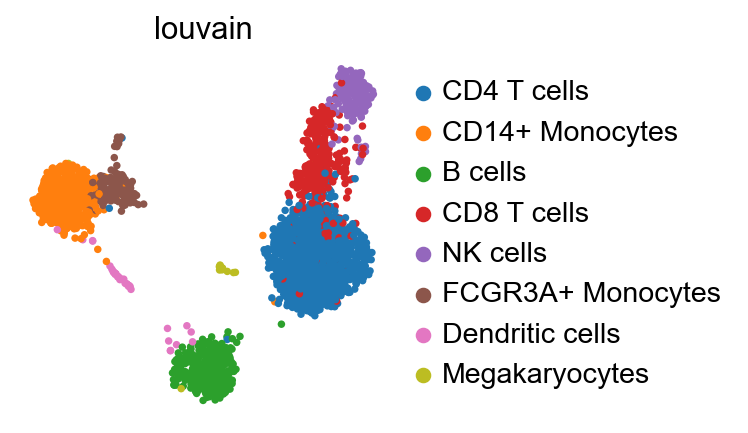

In [20]:
sc.pl.umap(adata_ref, color='louvain')

In [21]:
sc.tl.ingest(adata, adata_ref, obs='louvain')

d:\python-3.7.4-embed-amd64\python\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "d:\python-3.7.4-embed-amd64\python\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))


In [22]:
adata

AnnData object with n_obs × n_vars = 700 × 208 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'rep'
    varm: 'PCs'

In [23]:
adata.obs.louvain

index
AAAGCCTGGCTAAC-1      CD14+ Monocytes
AAATTCGATGCACA-1    FCGR3A+ Monocytes
AACACGTGGTCTTT-1             NK cells
AAGTGCACGTGCTA-1          CD4 T cells
ACACGAACGGAGTG-1      Dendritic cells
                          ...        
TGGCACCTCCAACA-8      Dendritic cells
TGTGAGTGCTTTAC-8    FCGR3A+ Monocytes
TGTTACTGGCGATT-8          CD4 T cells
TTCAGTACCGGGAA-8              B cells
TTGAGGTGGAGAGC-8              B cells
Name: louvain, Length: 700, dtype: category
Categories (8, object): [CD4 T cells, CD14+ Monocytes, B cells, CD8 T cells, NK cells, FCGR3A+ Monocytes, Dendritic cells, Megakaryocytes]

In [25]:
adata_ref.obs.louvain

index
AAACATACAACCAC-1        CD4 T cells
AAACATTGAGCTAC-1            B cells
AAACATTGATCAGC-1        CD4 T cells
AAACCGTGCTTCCG-1    CD14+ Monocytes
AAACCGTGTATGCG-1           NK cells
                         ...       
TTTCGAACTCTCAT-1    CD14+ Monocytes
TTTCTACTGAGGCA-1            B cells
TTTCTACTTCCTCG-1            B cells
TTTGCATGAGAGGC-1            B cells
TTTGCATGCCTCAC-1        CD4 T cells
Name: louvain, Length: 2638, dtype: category
Categories (8, object): [CD4 T cells, CD14+ Monocytes, B cells, CD8 T cells, NK cells, FCGR3A+ Monocytes, Dendritic cells, Megakaryocytes]

In [26]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors

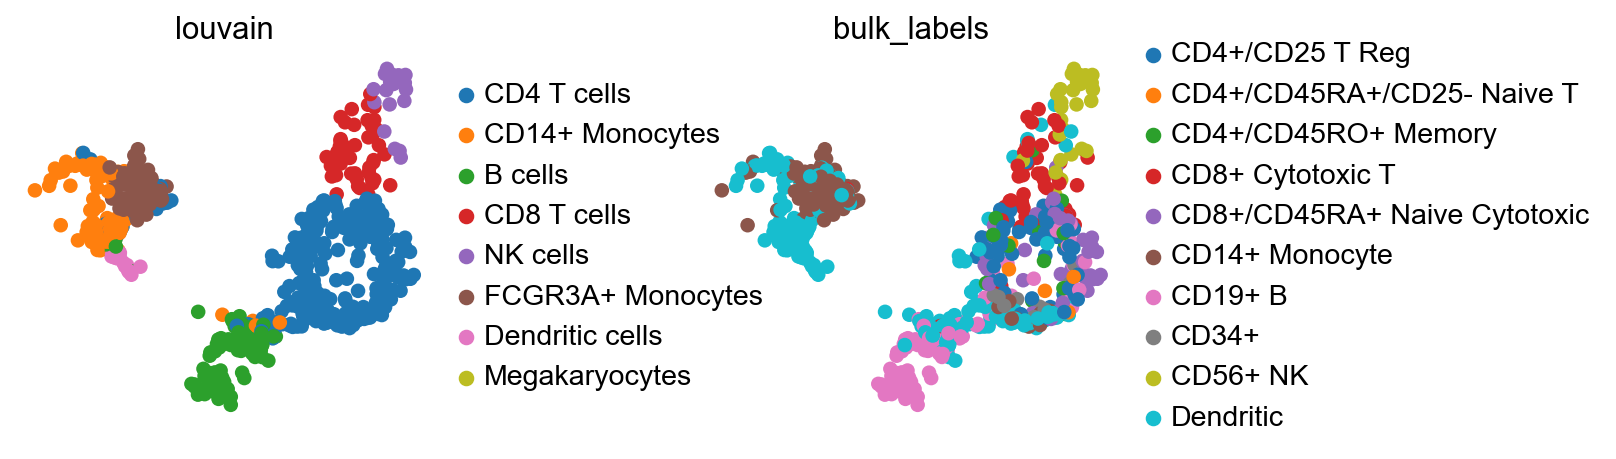

In [27]:
sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.5)

In [28]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

In [29]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208 
    obs: 'G2M_score', 'S_score', 'batch', 'bulk_labels', 'louvain', 'n_counts', 'n_genes', 'percent_mito', 'phase'
    var: 'n_cells-ref', 'n_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'highly_variable-new'
    obsm: 'X_pca', 'X_umap'

In [35]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')

In [36]:
adata_concat.obs.louvain.cat.reorder_categories(adata_ref.obs.louvain.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix category colors

... storing 'bulk_labels' as categorical
... storing 'phase' as categorical


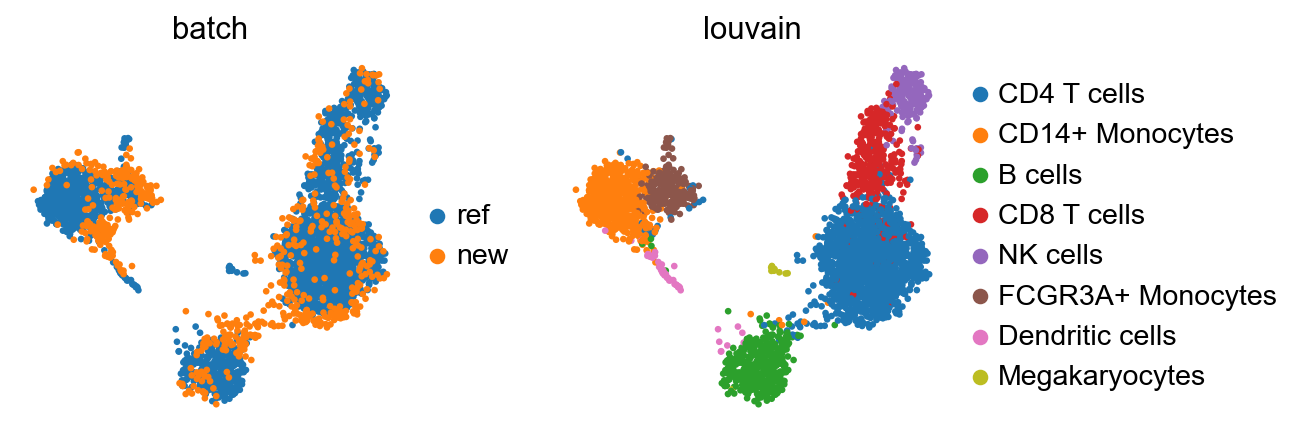

In [37]:

sc.pl.umap(adata_concat, color=['batch', 'louvain'])

In [38]:
badata = sc.datasets.pbmc68k_reduced()

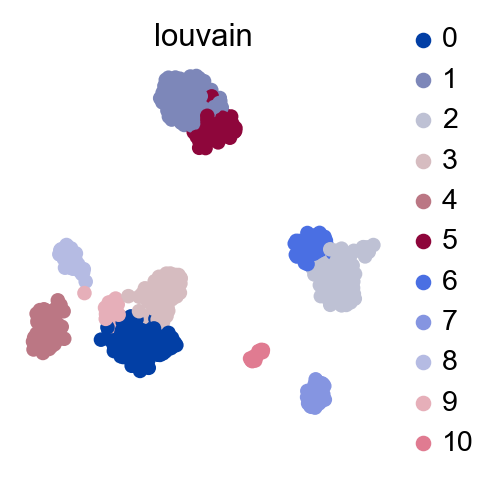

In [40]:
sc.pl.umap(badata, color=['louvain'])

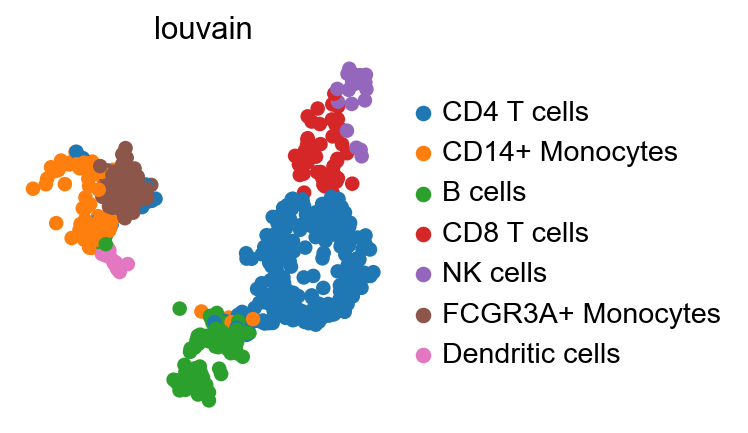

In [41]:
sc.pl.umap(adata, color=['louvain'])

In [43]:
sc.tl.pca(adata_concat)